In [7]:
import sys
sys.path.append('..')
import utils.matrix as matrix
import utils.matrix_plot as matrix_plot
%matplotlib inline


In [6]:
# read data
bias_type = "base_rate" # base_rate/sample_size_bias/ under_representation_bias/mean_shift/variance_shift
data_type = "scatter" #scatter / cluster
method = "FairOD"
if bias_type == "sample_size_bias":
    axis_title = r'$\beta_s$'
elif bias_type == "under_representation_bias":
    axis_title = r'$\beta_u$'
elif bias_type == "variance_shift":
    axis_title = r'$\beta_v$'
elif bias_type == "mean shift":
    axis_title = r'$\beta_m$'
elif bias_type == "base_rate":
    axis_title = r'$\beta_b$'
else: 
    axis_title = r'$\beta_g$'
#axis_title = 'variance_shift'
# hparam_list, fscore = matrix.read_hparam(f'../../result/hparam_value/{bias_type}/{data_type}/{method}.json')
x_axis, base_rate_a, base_rate_b, base_rate_whole, flag_rate_a, flag_rate_b, recall_a, recall_b, \
    tpr_whole, fpr_a, fpr_b, fpr_whole, ppr_a, ppr_b, ppr_whole, \
         flag_ratio, true_positive_ratio, fpr_ratio, ppr_ratio, auroc = matrix.read_data(f'../result/new_results/{bias_type}/{data_type}/{method}.json')
violin_true, violin_df = matrix.read_violin(f'../result/data/{bias_type}/{data_type}/{method}.json')

/home/rxi2/fairod/matrix.py:240: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  violin_true = pd.read_json(combined_json['violin_true'], orient='records')
/home/rxi2/fairod/matrix.py:241: FutureWarning: Passing literal json to 'read_json' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  violin_df = pd.read_json(combined_json['violin_df'], orient='records')


In [ ]:
print("tpr", tpr_whole)
print("auroc", auroc)

tpr [[0.67, 0.605, 0.505, 0.49, 0.315, 0.52], [0.705, 0.64, 0.465, 0.38, 0.715, 0.535], [0.75, 0.625, 0.495, 0.36, 0.575, 0.695], [0.7, 0.62, 0.41, 0.49, 0.415, 0.435], [0.585, 0.49, 0.485, 0.385, 0.52, 0.385]]
auroc [[0.8963111111111111, 0.8801638888888889, 0.849763888888889, 0.8498888888888888, 0.8083138888888889, 0.8779722222222223], [0.9227027777777776, 0.9081416666666666, 0.8528361111111111, 0.8421527777777779, 0.9344111111111111, 0.8934583333333334], [0.936813888888889, 0.8963694444444444, 0.8502777777777778, 0.8282861111111111, 0.9087944444444445, 0.9543444444444444], [0.9332749999999999, 0.9122166666666667, 0.810138888888889, 0.9031833333333332, 0.8409805555555555, 0.8588444444444445], [0.865825, 0.8528499999999999, 0.8491472222222223, 0.8186444444444444, 0.8682347222222221, 0.8054388888888889]]


In [ ]:
path = f'../result/{method}_distance/{bias_type}/{data_type}/distance.json'
alpha, gamma = matrix.get_optimal_from_distance(path)
print('alpha:', alpha)
print('gamma:', gamma)

alpha: ['0.01', '0.01', '0.5', '0.8', '0.8', '0.8']
gamma: ['0.01', '0.01', '0.01', '0.01', '0.01', '0.01']


In [ ]:
# beta_v = prop_b = list(range(1,5)) # base_rate
#beta_v = [0, 0.05, 0.1, 0.2, 0.5, 1, 2, 4, 6] # variance shift cluster
#beta_v =  [0, 0.05, 0.1, 0.2, 0.4, 0.7, 1, 1.5, 2, 2.5, 3] # variance shift add scatter
# beta_v = [ 0.01, 0.05, 0.10, 0.2, 0.4,  0.6, 0.8] # under/ sample size
# beta_v = [0.05, 0.1, 0.15, 0.2, 0.3, 0.4]
tpr_whole_mean = matrix.get_mean(tpr_whole)
fpr_whole_mean = matrix.get_mean(fpr_whole)
ppr_whole_mean = matrix.get_mean(ppr_whole)
auroc_mean = matrix.get_mean(auroc)
#matrix_plot.plot_whole(axis_title, beta_v, tpr_whole_mean, fpr_whole_mean, ppr_whole_mean, auroc_mean)
print(auroc_mean)
print(tpr_whole_mean)

[0.962222905027933, 0.9531842439791394, 0.961611583018815, 0.9593813443072703, 0.9513628453725407, 0.9625211410531064, 0.9326612903225806]
[0.817, 0.7989847715736041, 0.8106951871657753, 0.8133333333333332, 0.7833333333333334, 0.8330827067669173, 0.7548387096774193]


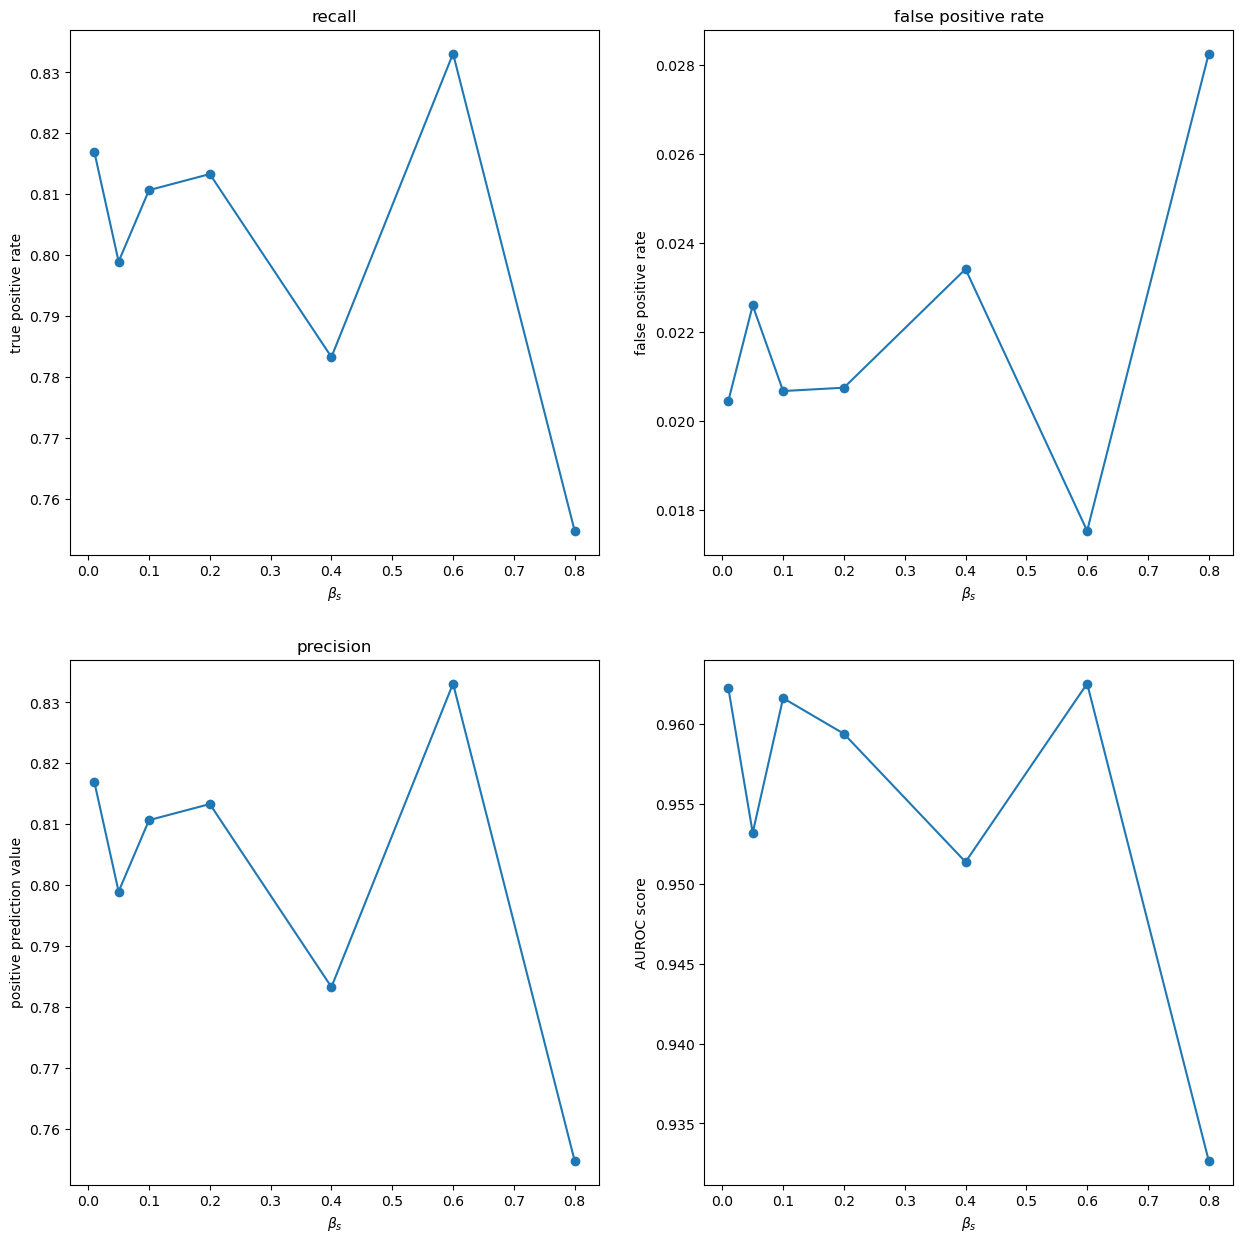

In [ ]:
matrix_plot.plot_whole(axis_title, x_axis, tpr_whole_mean, fpr_whole_mean, ppr_whole_mean, auroc_mean)

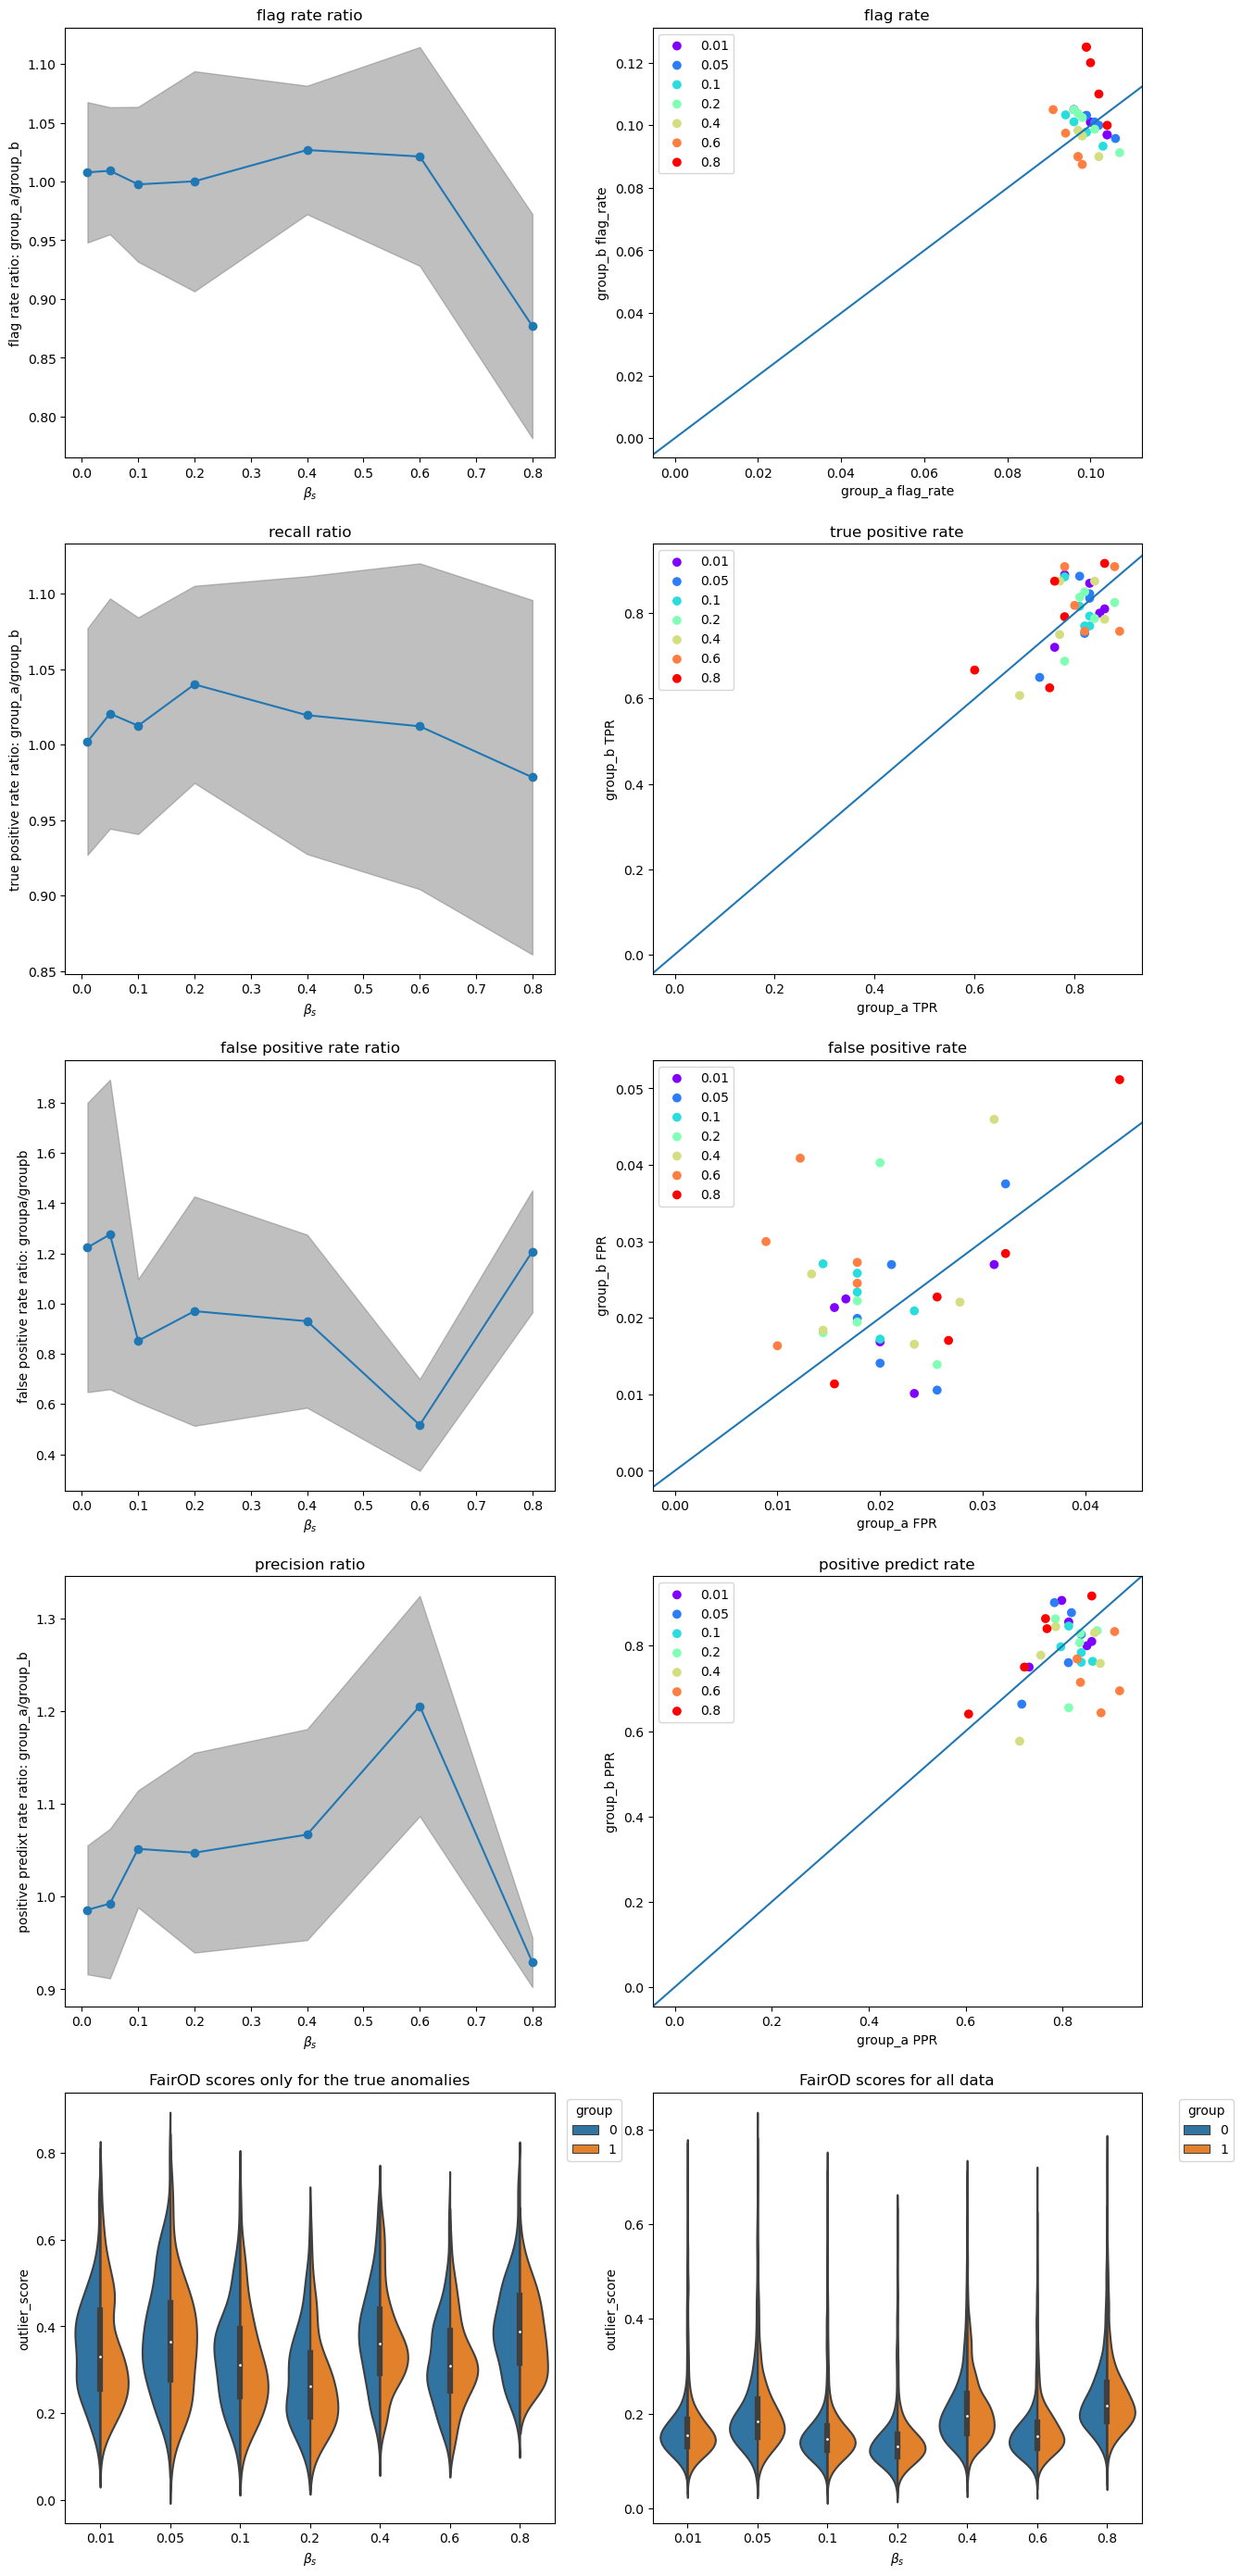

In [ ]:
violin_title = "FairOD"

flag_ratio_mean = matrix.get_mean(flag_ratio)
true_positive_mean = matrix.get_mean(true_positive_ratio)
fpr_ratio_mean = matrix.get_mean(fpr_ratio)
ppr_ratio_mean = matrix.get_mean(ppr_ratio) 

flag_ratio_var = matrix.get_var(flag_ratio_mean, flag_ratio)
true_positive_var = matrix.get_var(true_positive_mean, true_positive_ratio)
fpr_ratio_var = matrix.get_var(fpr_ratio_mean, fpr_ratio)
ppr_ratio_var = matrix.get_var(ppr_ratio_mean, ppr_ratio)

matrix_plot.plot(violin_title, axis_title, x_axis, violin_true, violin_df, flag_ratio_var, flag_ratio_mean, 
                    flag_rate_a, flag_rate_b, true_positive_var, true_positive_mean, 
                    recall_a, recall_b, fpr_ratio_var, fpr_ratio_mean, fpr_a, 
                    fpr_b, ppr_ratio_var, ppr_ratio_mean, ppr_a, ppr_b)

In [ ]:
# under represenatation base rate update
base_rate_a = [0.1]*len(x_axis)
base_rate_b = []
for i in x_axis:
    base_rate_b.append(100*(1-i)/1000)# base_rate_b = []
print(base_rate_b)

[0.099, 0.095, 0.09, 0.08, 0.06, 0.04, 0.019999999999999997]


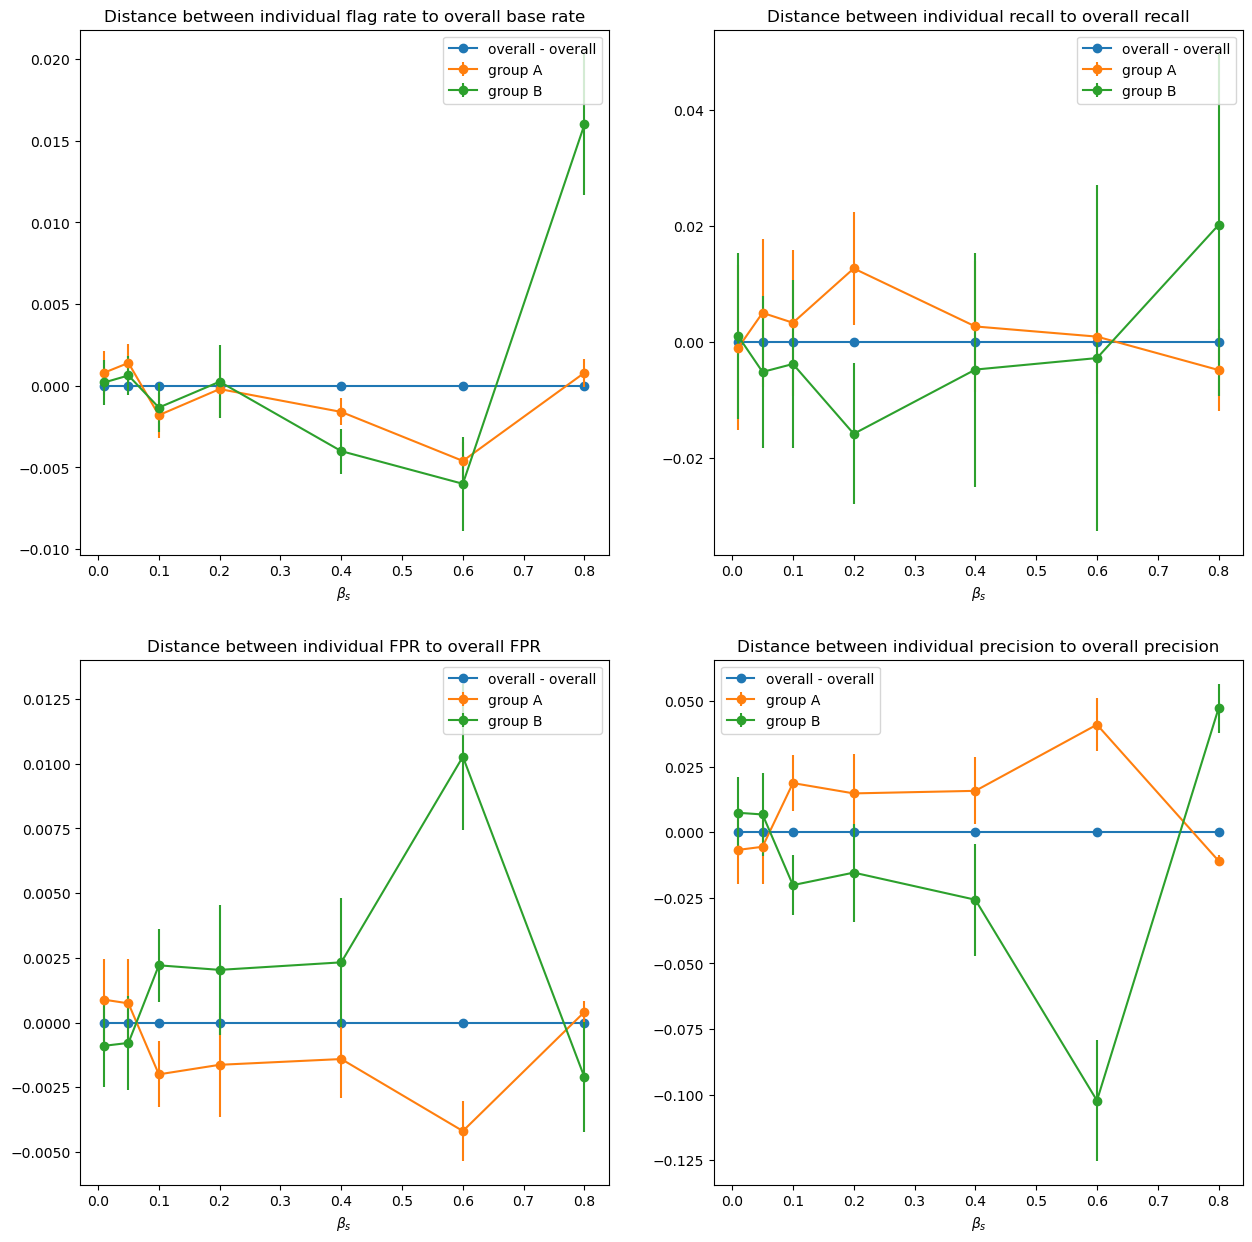

In [ ]:
matrix_plot.plot_diff(axis_title, x_axis, 
                        flag_rate_a, flag_rate_b, base_rate_a, base_rate_b,
                        recall_a, recall_b, tpr_whole, 
                        fpr_a, fpr_b, fpr_whole, 
                        ppr_a, ppr_b, ppr_whole)

# base_rate
# matrix_plot.plot_diff(axis_title, x_axis, 
#                         flag_rate_b, flag_rate_a, base_rate_b, base_rate_a,
#                         recall_b, recall_a, tpr_whole, 
#                         fpr_b, fpr_a, fpr_whole, 
#                         ppr_b, ppr_a, ppr_whole)

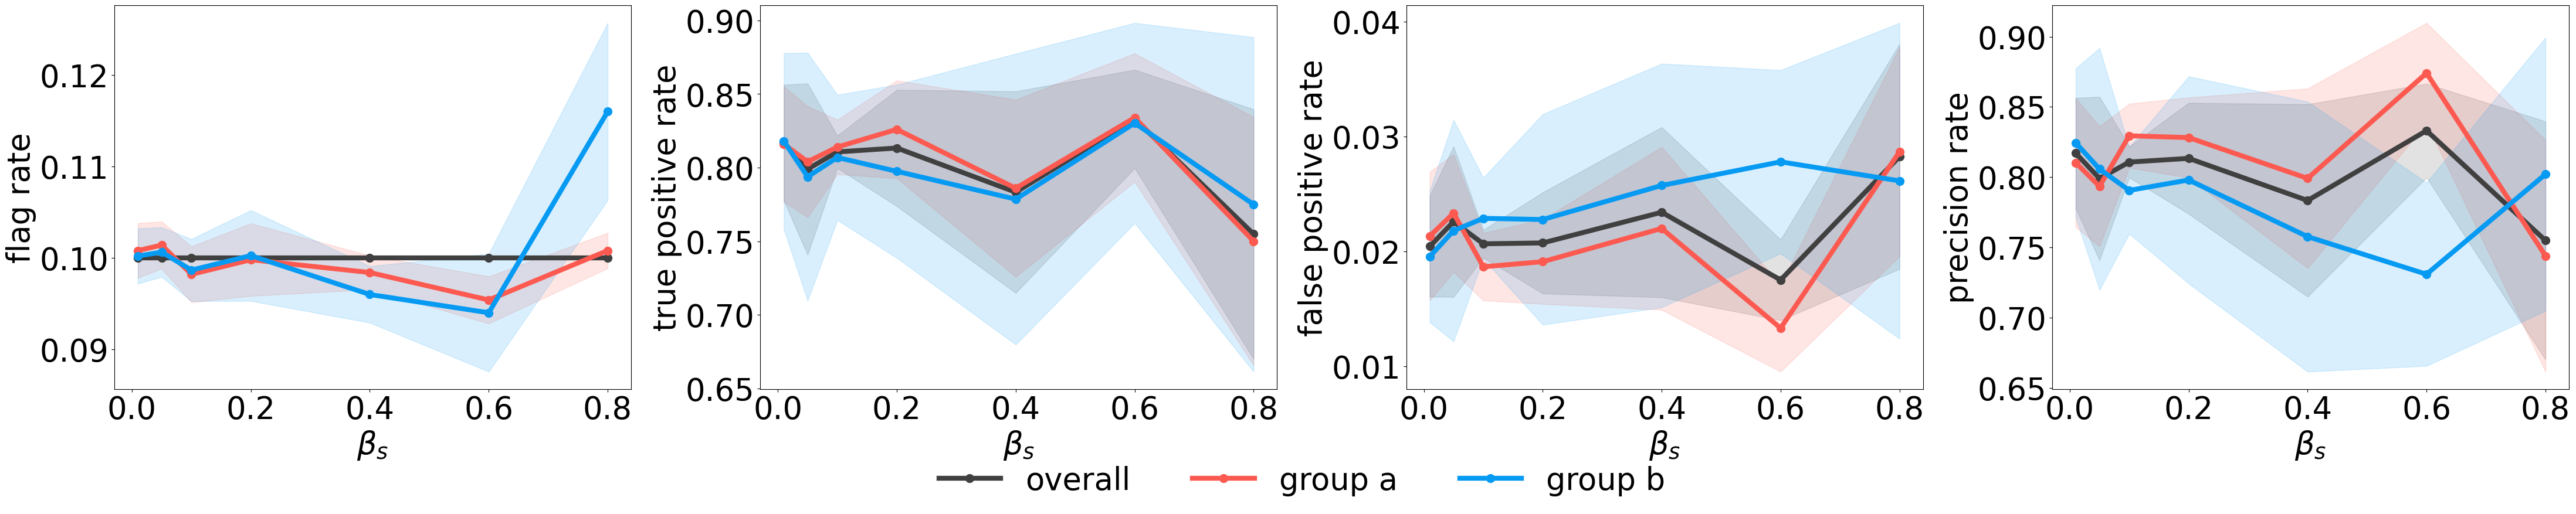

In [ ]:
matrix_plot.plot_line_final(axis_title, x_axis, flag_rate_a, flag_rate_b,
                        base_rate_a, base_rate_b, recall_a, recall_b, tpr_whole, 
                        fpr_a, fpr_b, fpr_whole, ppr_a, ppr_b, ppr_whole)

# base_rate
# matrix_plot.plot_line_final(axis_title, x_axis, flag_rate_b, flag_rate_a, base_rate_b, base_rate_a, recall_b, recall_a, tpr_whole, fpr_b, fpr_a, fpr_whole, ppr_b, ppr_a, ppr_whole)

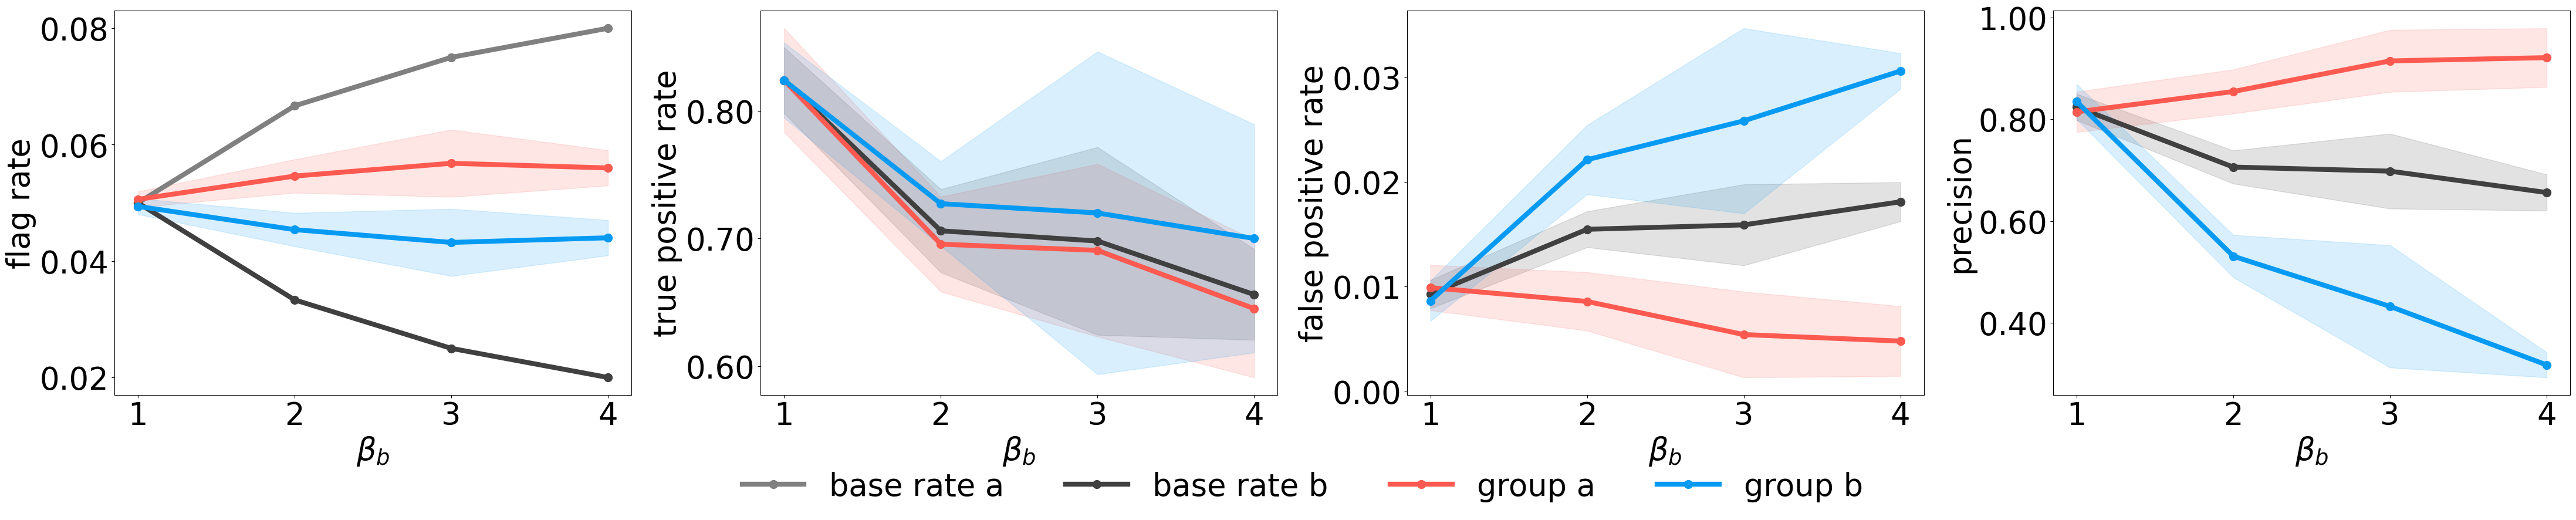

In [8]:
# base_rate_a = [base_rate_a] * len(x_axis)
# base_rate_b = []
# for i in x_axis:
#     base_rate_b.append(100*(1-i)/1000)# base_rate_b = []
# print(base_rate_b)
# matrix_plot.plot_line_final(axis_title, x_axis, flag_rate_a, flag_rate_b,
#                         base_rate_a, base_rate_b, recall_a, recall_b, tpr_whole, 
#                         fpr_a, fpr_b, fpr_whole, ppr_a, ppr_b, ppr_whole)

matrix_plot.plot_line_final(axis_title, x_axis, flag_rate_b, flag_rate_a, base_rate_b, base_rate_a, recall_b, recall_a, tpr_whole, fpr_b, fpr_a, fpr_whole, ppr_b, ppr_a, ppr_whole)

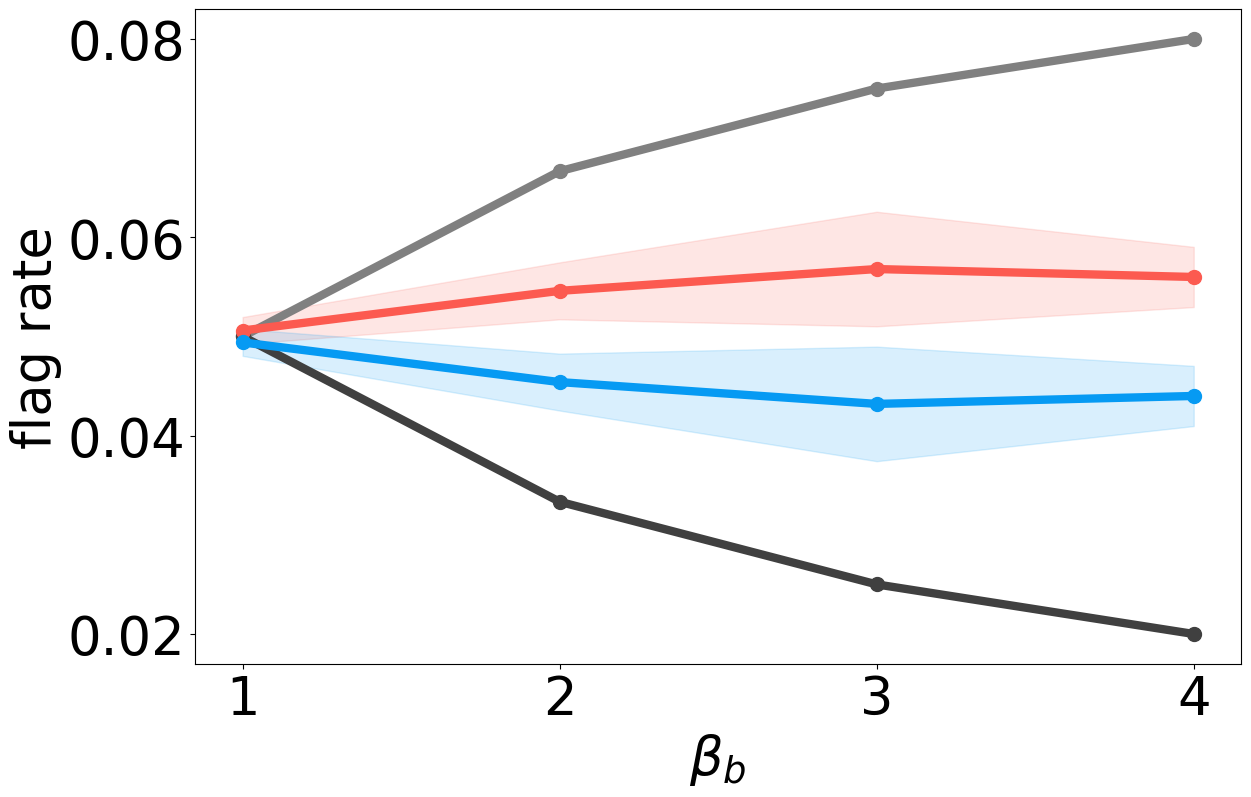

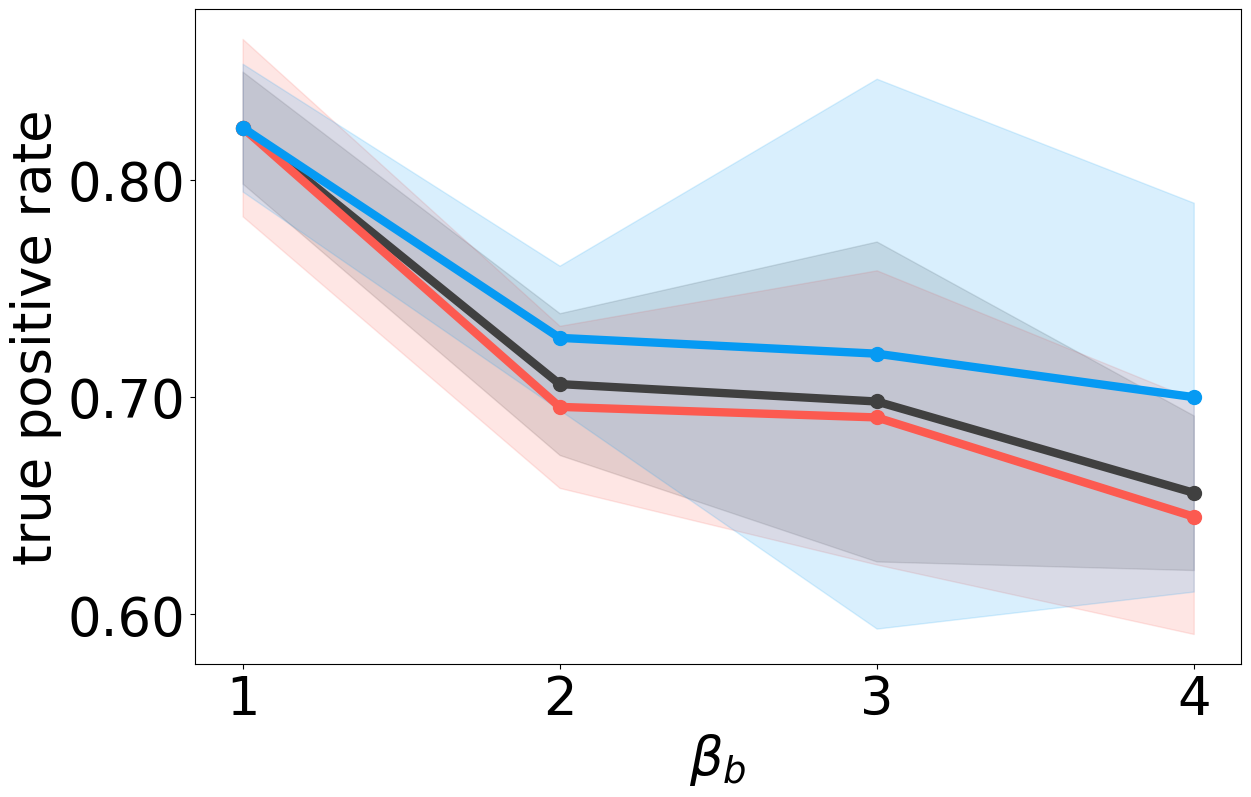

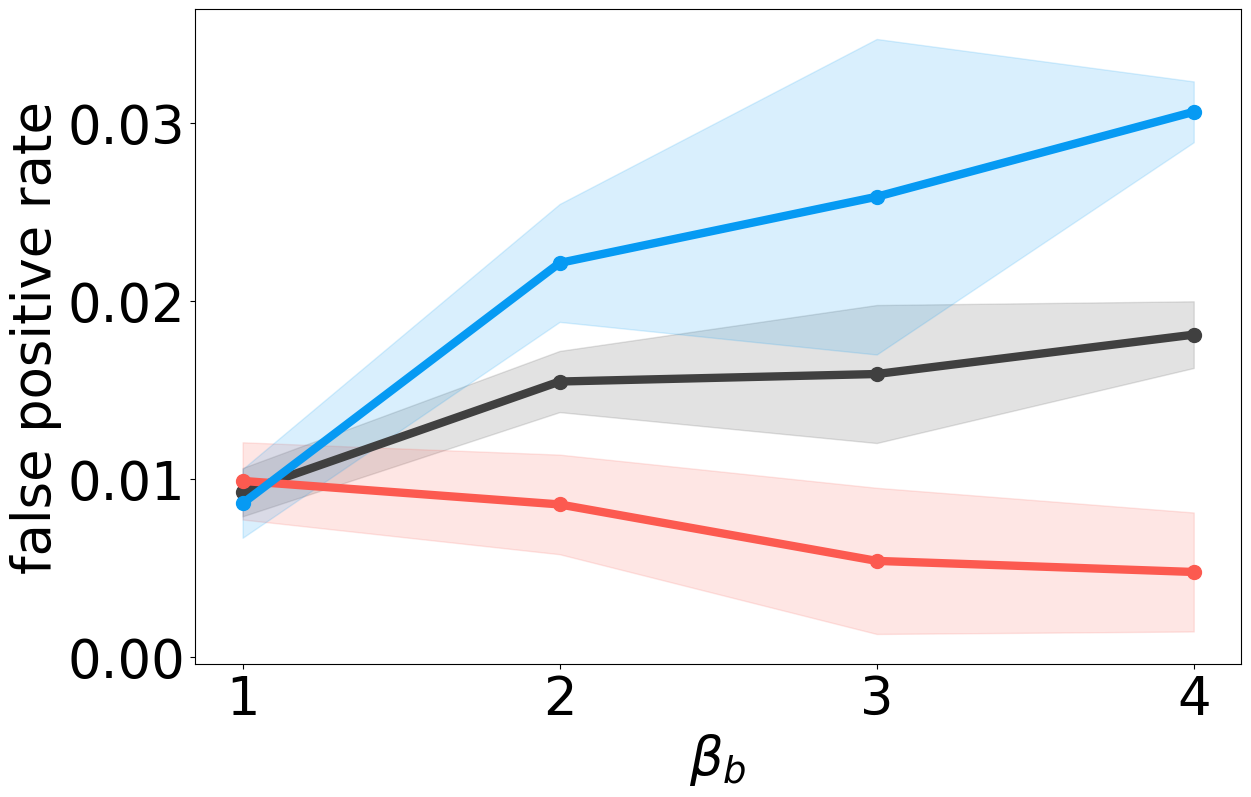

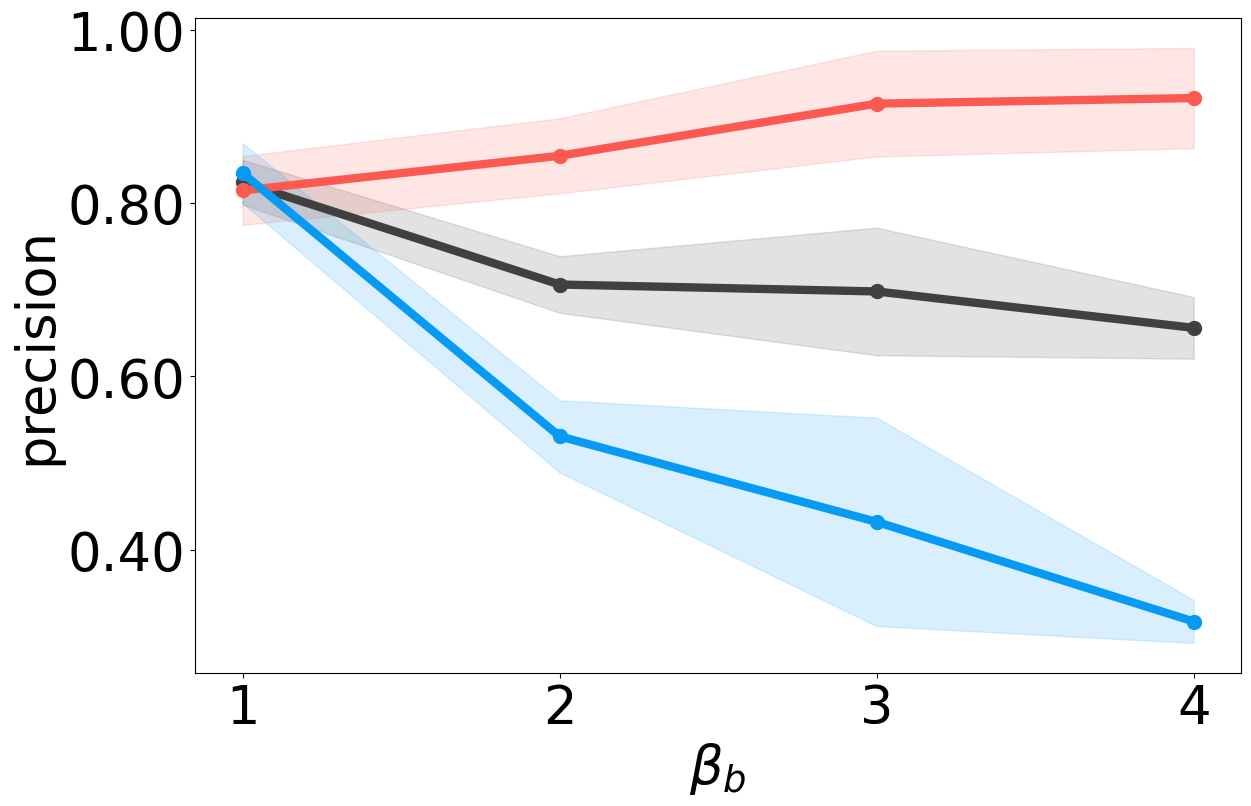

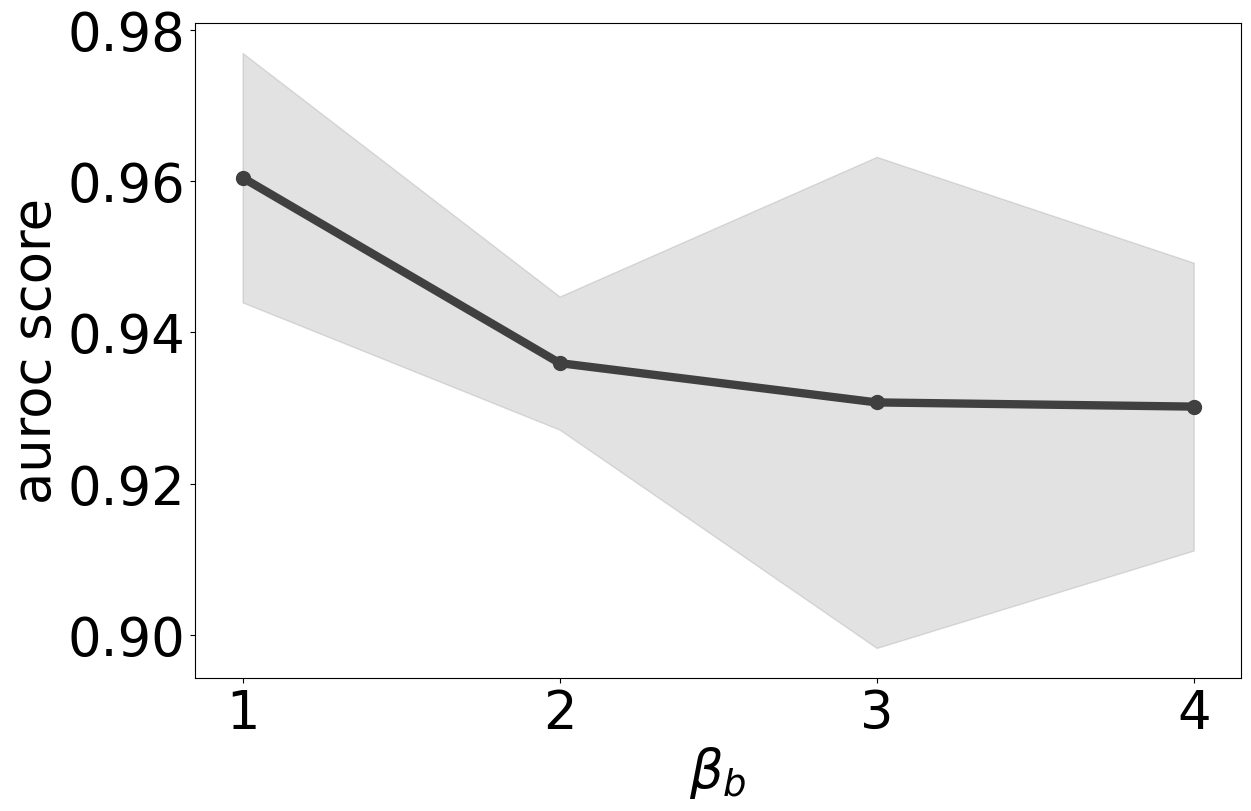

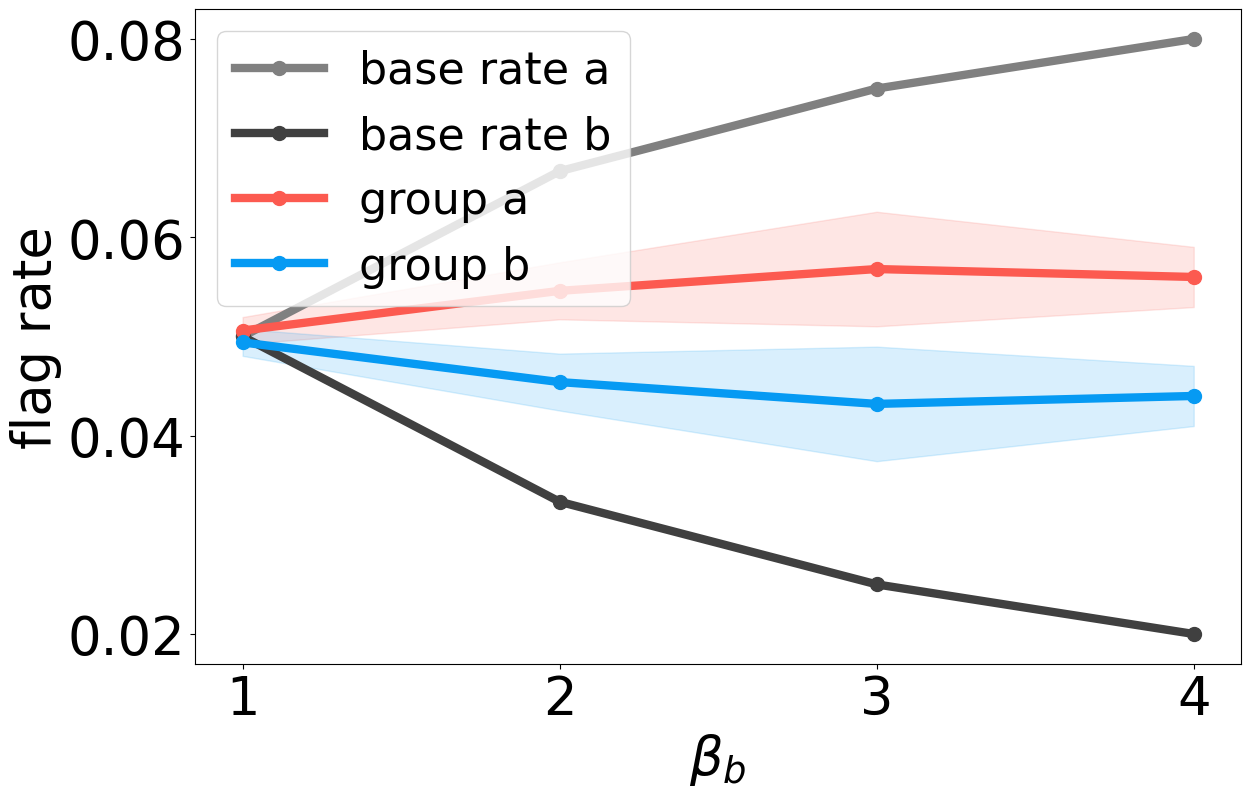

In [9]:
# matrix_plot.fr(axis_title, x_axis, flag_rate_a, flag_rate_b, base_rate_a, base_rate_b)
# matrix_plot.tpr(axis_title, x_axis, flag_rate_a, flag_rate_b, recall_a, recall_b, tpr_whole)
# matrix_plot.fpr(axis_title, x_axis, flag_rate_a, flag_rate_b, fpr_a, fpr_b, fpr_whole)
# matrix_plot.prec(axis_title, x_axis, flag_rate_a, flag_rate_b, ppr_a, ppr_b, ppr_whole)
# matrix_plot.auroc(auroc, x_axis, axis_title)
# matrix_plot.fr_legend(axis_title, x_axis, flag_rate_a, flag_rate_b, base_rate_a, base_rate_b)

matrix_plot.fr(axis_title, x_axis, flag_rate_b, flag_rate_a, base_rate_b, base_rate_a)
matrix_plot.tpr(axis_title, x_axis, flag_rate_b, flag_rate_a, recall_b, recall_a, tpr_whole)
matrix_plot.fpr(axis_title, x_axis, flag_rate_b, flag_rate_a, fpr_b, fpr_a, fpr_whole)
matrix_plot.prec(axis_title, x_axis, flag_rate_b, flag_rate_a, ppr_b, ppr_a, ppr_whole)
matrix_plot.auroc(auroc, x_axis, axis_title)
matrix_plot.fr_legend(axis_title, x_axis, flag_rate_b, flag_rate_a, base_rate_b, base_rate_a)


In [3]:
# best gamma, alpha
seed = [123, 124, 125, 126, 127]
for exp in range(len(seed)):
    print(seed[exp])
    alpha_list, gamma_list = matrix.read_fairod_param(f'../result/hparam_value/{bias_type}/{data_type}/{method}/seed_{seed[exp]}.json')
    print("alpha", alpha_list)
    print("gamma", gamma_list)

123
alpha [0.8, 0.5, 0.001, 0.2, 0.001, 0.001, 0.001, 0.001, 0.05]
gamma [0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
124
alpha [0.2, 0.5, 0.2, 0.001, 0.001, 0.001, 0.001, 0.001, 0.01]
gamma [0.001, 0.001, 0.2, 0.001, 0.001, 0.001, 0.001, 0.001, 0.2]
125
alpha [0.05, 0.001, 0.2, 0.001, 0.001, 0.01, 0.001, 0.001, 0.05]
gamma [0.001, 0.001, 0.5, 0.001, 0.001, 0.001, 0.2, 0.001, 0.001]
126
alpha [0.01, 0.2, 0.01, 0.5, 0.001, 0.05, 0.001, 0.001, 0.001]
gamma [0.001, 0.001, 0.8, 0.001, 0.001, 0.001, 0.2, 0.001, 0.001]
127
alpha [0.001, 0.99, 0.99, 0.001, 0.001, 0.001, 0.05, 0.01, 0.05]
gamma [0.001, 0.2, 0.5, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001]
